# Sprint 6

## Scratch Decision Tree

### [Problem 1-4] Decision Tree Scratch 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        # Create a list contains many Nodes, each Node include:
        # (information_gain, feature_index, threshold, left_node, right_node)
        # left_node and right_node can be None when there is no child node
        self.split_det = dict()
        
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        idx, stat = self._divide(X, y, return_stat=True)
        self.split_det = {
            'stat': stat,
            'left': {},
            'right': {}
        }
        
        if self.verbose:
            print(self.split_det)
        pass
    
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        f_idx, threshold = self.split_det['stat'][1:]
        return np.where(X[:, f_idx] < threshold, 0, 1)
    
    def _divide(self, X_parent, y_parent, return_stat=False):
        # Initialize arguments
        threshold = np.inf
        feature_index = -1
        min_sum_imp = np.inf
        
        # Get information about the parent node
        n_samples, n_features = X_parent.shape
        count_parent = self._unique_count(y_parent)
        gini_imp_parent = self._gini_imp(count_parent)
        
        # Select feature and value for threshold to divide
        for f_idx in range(n_features):
            unique_values_f = np.unique(X[:, f_idx])
            for val in unique_values_f:
                y_left = y[X[:, f_idx] < val]
                y_right = y[X[:, f_idx] >= val]
                count_left = self._unique_count(y_left)
                count_right = self._unique_count(y_right)
                sum_imp = self._sum_imp(count_left, count_right)
                if sum_imp < min_sum_imp:
                    min_sum_imp = sum_imp
                    feature_index = f_idx
                    threshold = val
        
        max_info_gain = gini_imp_parent - (min_sum_imp / count_parent.sum())
        index_left = X[:, feature_index] < threshold
        index_right = X[:, feature_index] >= threshold
        if not return_stat:
            return index_left, index_right
        else:
            return (index_left, index_right), (max_info_gain, feature_index, threshold) 
        
    def _unique_count(self, arr):
        return np.unique(arr, return_counts=True)[1]
    
    def _gini_imp(self, count):
        n_samples = count.sum()
        gini = 1 - np.power((count / n_samples), 2).sum()
        return gini
    
    def _info_gain(self, left, right):
        parent = left + right
        info_gain = self._gini_imp(parent) - (self._sum_imp(left, right) / parent.sum())
        return info_gain
    
    def _sum_imp(self, left, right):
        imp_sum = left.sum() * self._gini_imp(left) + right.sum() * self._gini_imp(right)
        return imp_sum

### [Problem 1] Function for finding impureness

In [3]:
def gini_imp_test(count):
    n_samples = count.sum()
    gini = 1 - np.power((count / n_samples), 2).sum()
    return gini

In [4]:
gini_imp_test(np.array([15, 15, 15]))

0.6666666666666667

### [Problem 2] Function for finding information gain

In [5]:
count_left = np.array([10, 30])
count_right = np.array([20, 5])

In [6]:
def info_gain_test(left, right):
    parent = left + right
    info_gain = (gini_imp_test(parent) - 
                 (left.sum() / parent.sum()) * gini_imp_test(left) - 
                 (right.sum() / parent.sum()) * gini_imp_test(right))
    return info_gain

In [7]:
info_gain_test(count_left, count_right)

0.14319526627218937

### [Problem 3] Learning

In [8]:
X = np.array([
    [1, 1, 1],
    [1.3, 0.8, 1.1],
    [3, 4, 5],
    [3.2, 3.8, 4.4],
])

In [9]:
y = np.array([0, 0, 1, 1])

In [10]:
sdt1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
sdt1.fit(X, y)

{'stat': (0.5, 0, 3.0), 'left': {}, 'right': {}}


### [Problem 4] Estimation

In [11]:
X_test = np.array([
    [0.8, 1.4, 1.8],
    [3, 4, 5],
    [2.7, 4, 5]
])

In [12]:
print(sdt1.predict(X_test))

[0 1 0]


### [Problem 5] Learning and Estimation

In [13]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
sdt1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
sdt1.fit(X_train, y_train)

{'stat': (-0.03680936520376177, 1, 5.3524), 'left': {}, 'right': {}}


In [16]:
y_pred = sdt1.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
y_test

array([0, 1, 1, 1, 1, 0, 1, 1])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       1.00      0.17      0.29         6

    accuracy                           0.38         8
   macro avg       0.64      0.58      0.37         8
weighted avg       0.82      0.38      0.33         8



In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 0, 0, 0, 1, 0, 0, 0])

In [20]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       1.00      0.17      0.29         6

    accuracy                           0.38         8
   macro avg       0.64      0.58      0.37         8
weighted avg       0.82      0.38      0.33         8



### [Problem 6] Visualization of decision area

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

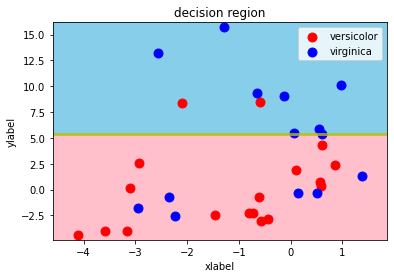

In [22]:
decision_region(X_train, y_train, sdt1)

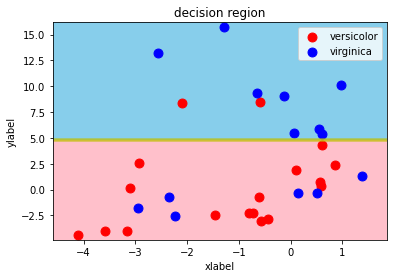

In [23]:
decision_region(X_train, y_train, dtc)

In [24]:
import pprint

class ScratchDecesionTreeClassifier():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False, max_depth=None):
        # Record hyperparameters as attributes
        self.verbose = verbose
        # Create a list contains many Nodes, each Node include:
        # (information_gain, feature_index, threshold, left_node, right_node)
        # left_node and right_node can be None when there is no child node
        self.split_det = dict()
        self.max_depth = max_depth if max_depth is not None else np.inf
        
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self._get_deep(X, y, 1, self.split_det)
        
        if self.verbose:
            pprint.pprint(self.split_det)
        pass
    
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        y = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            y[i] = self._classify(x, self.split_det)
        return y
    
    def _classify(self, x, node: dict):
        if 'class' in node.keys():
            return node['class']
        f_idx, threshold = node['stat'][1:]
        if x[f_idx] >= threshold:
            return self._classify(x, node['right'])
        else:
            return self._classify(x, node['left'])
    
    def _get_deep(self, X, y, depth, node: dict):
        if len(np.unique(y)) == 1:
            node['class'] = np.unique(y)[0]
            return
        elif depth > self.max_depth:
            u, c = np.unique(y, return_counts = True)
            node['class'] = u[c == c.max()][0]
            return
        idx, stat = self._divide(X, y, return_stat=True)
        node['stat'] = stat
        node['left'] = {}
        node['right'] = {}
        self._get_deep(X[idx[0], :], y[idx[0]], depth + 1, node['left'])
        self._get_deep(X[idx[1], :], y[idx[1]], depth + 1, node['right'])
    
    def _divide(self, X_parent, y_parent, return_stat=False):
        # Initialize arguments
        threshold = np.inf
        feature_index = -1
        min_sum_imp = np.inf
        
        # Get information about the parent node
        n_samples, n_features = X_parent.shape
        count_parent = self._unique_count(y_parent)
        gini_imp_parent = self._gini_imp(count_parent)
        
        # Select feature and value for threshold to divide
        for f_idx in range(n_features):
            unique_values_f = np.unique(X_parent[:, f_idx])
            for val in unique_values_f:
                y_left = y_parent[X_parent[:, f_idx] < val]
                y_right = y_parent[X_parent[:, f_idx] >= val]
                count_left = self._unique_count(y_left)
                count_right = self._unique_count(y_right)
                sum_imp = self._sum_imp(count_left, count_right)
                if sum_imp < min_sum_imp:
                    min_sum_imp = sum_imp
                    feature_index = f_idx
                    threshold = val
        
        max_info_gain = np.round(gini_imp_parent - (min_sum_imp / count_parent.sum()), 3)
        index_left = X_parent[:, feature_index] < threshold
        index_right = X_parent[:, feature_index] >= threshold
        if not return_stat:
            return index_left, index_right
        else:
            return (index_left, index_right), (max_info_gain, feature_index, threshold) 
        
    def _unique_count(self, arr):
        return np.unique(arr, return_counts=True)[1]
    
    def _gini_imp(self, count):
        n_samples = count.sum()
        gini = 1 - np.power((count / n_samples), 2).sum()
        return gini
    
    def _info_gain(self, left, right):
        parent = left + right
        info_gain = self._gini_imp(parent) - self._sum_imp(left, right)
        return info_gain
    
    def _sum_imp(self, left, right):
        imp_sum = left.sum() * self._gini_imp(left) + right.sum() * self._gini_imp(right)
        return imp_sum

In [25]:
sdt1 = ScratchDecesionTreeClassifier(verbose=True, max_depth=1)
sdt1.fit(X_train, y_train)

{'left': {'class': 0}, 'right': {'class': 1}, 'stat': (0.119, 1, 5.3524)}


In [26]:
i = 5
sdt = ScratchDecesionTreeClassifier(verbose=True, max_depth=i)
sdt.fit(X_train, y_train)
sdt_pred = sdt.predict(X_test)

print('Depth {} result'.format(i))
display(pd.DataFrame([sdt_pred, y_test], index=['Predict value', 'Actual value']))

print(classification_report(y_test, sdt_pred))

{'left': {'left': {'left': {'left': {'left': {'class': 0},
                                     'right': {'class': 0},
                                     'stat': (0.079, 0, -1.4621)},
                            'right': {'class': 1},
                            'stat': (0.225, 1, -0.72261)},
                   'right': {'class': 0},
                   'stat': (0.057, 1, 0.15394)},
          'right': {'class': 1},
          'stat': (0.05, 0, 1.3763)},
 'right': {'left': {'left': {'class': 0},
                    'right': {'class': 1},
                    'stat': (0.48, 1, 9.3444)},
           'right': {'class': 1},
           'stat': (0.08, 0, -0.12243)},
 'stat': (0.119, 1, 5.3524)}
Depth 5 result


,0,1,2,3,4,5,6,7
Predict value,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
Actual value,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.67      0.33      0.44         6

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8



In [27]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
display(pd.DataFrame([dtc_pred, y_test], index=['Predict value', 'Actual value']))

,0,1,2,3,4,5,6,7
Predict value,0,0,0,0,1,1,0,1
Actual value,0,1,1,1,1,0,1,1


In [28]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.67      0.33      0.44         6

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8



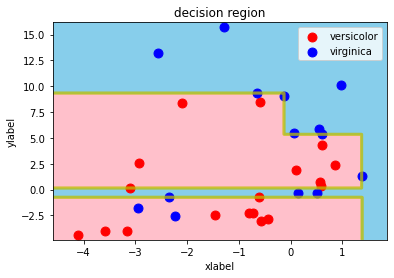

In [29]:
decision_region(X_train, y_train, sdt)

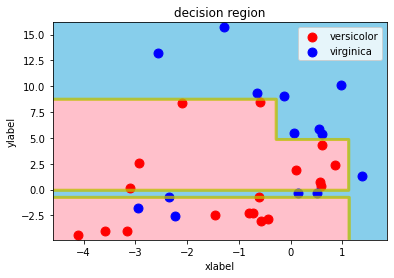

In [30]:
decision_region(X_train, y_train, dtc)